In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
traindf = pd.read_csv('train.csv')
testdf = pd.read_csv("test.csv" )

In [3]:
traindf.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [4]:
cols = ['EmployeeNumber','Id','MaritalStatus','Behaviour','StockOptionLevel','YearsAtCompany','PerformanceRating','MonthlyIncome','YearsSinceLastPromotion']
traindf.drop(cols, axis=1, inplace= True)
testdf.drop(cols, axis=1, inplace= True)

In [5]:
from sklearn.preprocessing import LabelEncoder

for column in traindf.columns:
        if traindf[column].dtype == np.number:
            continue
        traindf[column] = LabelEncoder().fit_transform(traindf[column])

In [6]:
traindf.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsInCurrentRole         0
YearsWithCurrManager       0
CommunicationSkill         0
dtype: int64

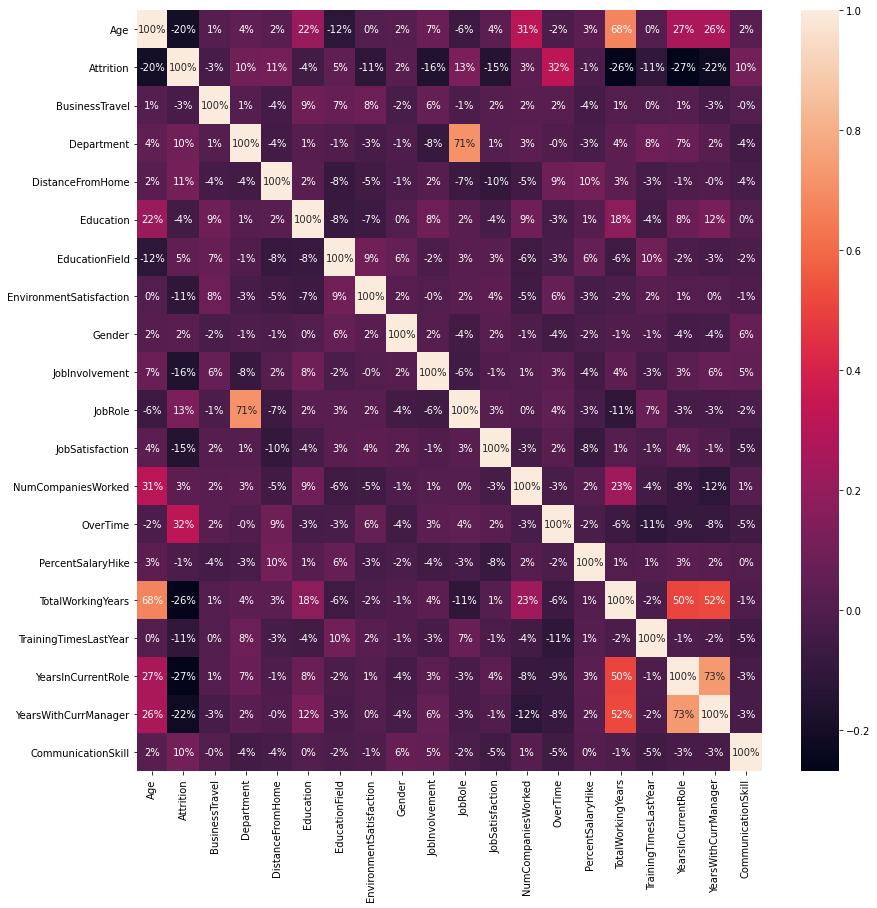

In [7]:
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(traindf.corr(), annot=True, fmt='.0%')

In [8]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split

In [9]:
target = traindf['Attrition']
features = traindf.drop('Attrition', axis = 1)
#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=79)

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250, random_state=79)

In [11]:
model.fit(X_train,y_train)
#predict the results for test
test_pred = model.predict_proba(X_test)
predicts = model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predicts)
accuracy

0.99079754601227

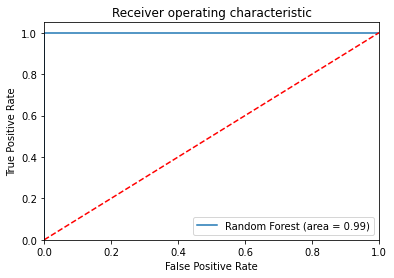

In [13]:
rf_roc_auc = roc_auc_score(y_test, model.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

## Test data set

In [14]:
from sklearn.preprocessing import LabelEncoder

for column in testdf.columns:
        if testdf[column].dtype == np.number:
            continue
        testdf[column] = LabelEncoder().fit_transform(testdf[column])

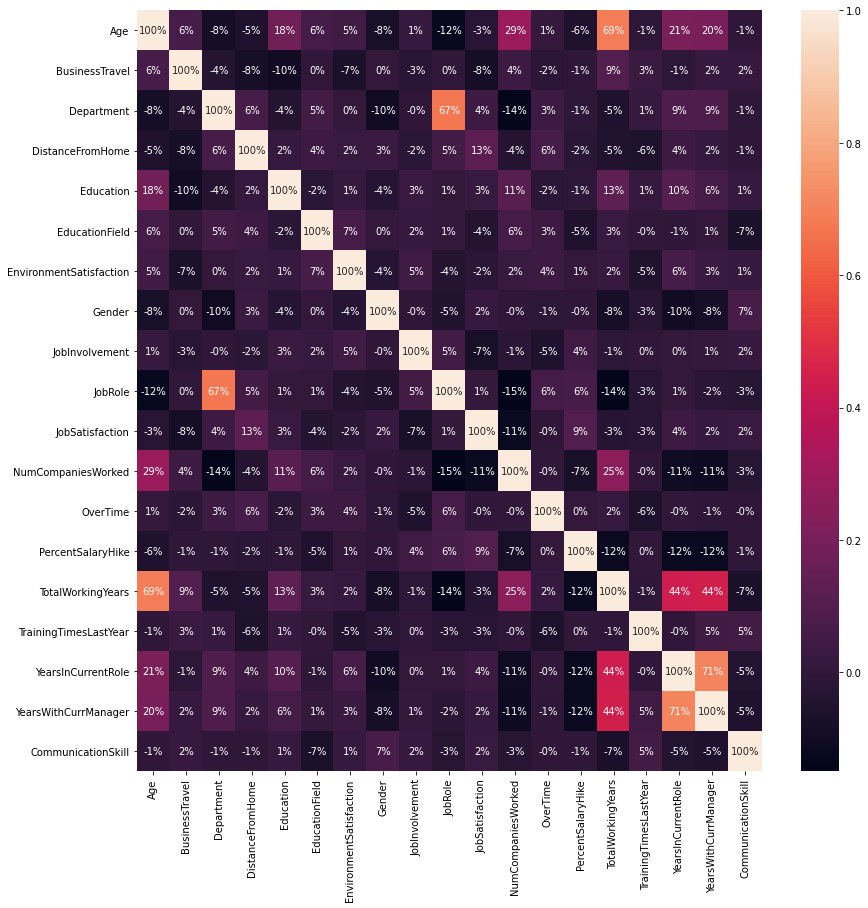

In [15]:
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(testdf.corr(), annot=True, fmt='.0%')

In [16]:
testdf_Xtest = testdf
test_predts = model.predict(testdf_Xtest)

In [17]:
test_prob = model.predict_proba(testdf_Xtest)
attrition = test_prob[:,1]

In [18]:
#ID = np.array(testdf.Id)+1

ID = np.arange(1,471)

In [19]:
attrition

array([0.108, 0.176, 0.212, 0.316, 0.096, 0.132, 0.464, 0.148, 0.352,
       0.192, 0.044, 0.404, 0.128, 0.072, 0.048, 0.076, 0.38 , 0.348,
       0.124, 0.008, 0.164, 0.584, 0.04 , 0.108, 0.1  , 0.024, 0.212,
       0.152, 0.616, 0.124, 0.024, 0.224, 0.18 , 0.192, 0.068, 0.112,
       0.332, 0.256, 0.144, 0.148, 0.68 , 0.168, 0.088, 0.252, 0.084,
       0.076, 0.072, 0.144, 0.044, 0.096, 0.388, 0.04 , 0.14 , 0.364,
       0.084, 0.412, 0.14 , 0.404, 0.04 , 0.092, 0.08 , 0.048, 0.28 ,
       0.016, 0.196, 0.112, 0.016, 0.216, 0.288, 0.248, 0.224, 0.036,
       0.284, 0.148, 0.272, 0.276, 0.196, 0.192, 0.172, 0.628, 0.148,
       0.212, 0.212, 0.076, 0.26 , 0.216, 0.38 , 0.088, 0.172, 0.588,
       0.272, 0.24 , 0.384, 0.092, 0.564, 0.392, 0.284, 0.124, 0.184,
       0.044, 0.2  , 0.248, 0.212, 0.252, 0.136, 0.148, 0.084, 0.108,
       0.228, 0.228, 0.38 , 0.204, 0.104, 0.136, 0.296, 0.056, 0.052,
       0.204, 0.08 , 0.088, 0.456, 0.336, 0.056, 0.268, 0.172, 0.132,
       0.156, 0.172,

In [23]:
df = pd.DataFrame({'Id': ID,
                   'Attrition': attrition})

df.to_csv('m11.csv', index=False)

In [21]:
accuracy = accuracy_score(y_test[:], test_predts[:-144])

In [22]:
accuracy

0.5030674846625767